### Sentiment Analysis of Glassdoor Job descriptions
It's frustrating that the title 'data scientist' can mean so many things. ML enthusiasts get hired into data engineering roles labeled as Data Scientist. They end up hating their jobs and quit.
This project aims at aiding the search for the right type of data scientist' role:
Focus on the skillsets, not the title.
If a job role talks about using a lot of SQL, Excel, building dashboard, and only briefly mentions potential machine learning tasks, it's most likely a product analytics or business intelligence role.
The solution: to extract the required skills while applying for a role scraping from Glassdoor to create a funnel of job descriptions that fit the bill. Augment topic modeling on top of this scraped data so that people can focus on the skillsets rather than falling into the hubris of titles.


In [47]:
#! pip install wordcloud

In [66]:
import numpy as np # linear algebra
import lux
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
from sklearn import decomposition
from wordcloud import WordCloud 
import matplotlib.pyplot as plt


In [67]:
# Data load

ds = pd.read_csv("DataScientist.csv", header = 0)
da = pd.read_csv("DataAnalyst.csv", header = 0)
ba = pd.read_csv("BusinessAnalyst.csv", header = 0)


In [68]:
# Data cleaning
da["Job Type"] = "Data Analyst"
ba["Job Type"] = "Business Analyst"
ds["Job Type"] = "Data Scientist"

#Data Cleaning
ba.drop(["index"],axis=1,inplace=True)
ds.drop(["index"],axis=1,inplace=True)

drop_columns = ['Unnamed: 0','Headquarters', 'Size', 'Founded', 'Revenue', 'Competitors', 'EasyApply']
ds.dropna()
da.dropna()
ba.dropna()
ds.drop(drop_columns, axis=1, inplace=True)
da.drop(drop_columns, axis=1, inplace=True)
ba.drop(drop_columns, axis=1, inplace=True)

## Data Scientist Roles

In [69]:
ds.head()

,JobTitle,SalaryEstimate,JobDescription,Rating,Company Name,Location,Typeofownership,Industry,Sector,Job Type
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY",Company - Private,Travel Agencies,Travel & Tourism,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY",Company - Private,"Health, Beauty, & Fitness",Consumer Services,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY",Unknown,-1,-1,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",Company - Private,Internet,Information Technology,Data Scientist
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY",Company - Private,Advertising & Marketing,Business Services,Data Scientist


####  Remove special characters and lower case letters

In [70]:
def clean_text(string_in):
    string_in = re.sub("[^a-zA-Z]", " ", str(string_in))  # Replace all non-letters with spaces
    string_in = string_in.lower()                         # Tranform to lower case    
    
    return string_in.strip()

ds["description_cleaned"] = ds.JobDescription.apply(clean_text)

In [30]:
ds.head()

,JobTitle,SalaryEstimate,JobDescription,Rating,Company Name,Location,Typeofownership,Industry,Sector,Job Type,description_cleaned
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY",Company - Private,Travel Agencies,Travel & Tourism,Data Scientist,about hopper at hopper we re on a mission to...
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY",Company - Private,"Health, Beauty, & Fitness",Consumer Services,Data Scientist,at noom we use scientifically proven methods ...
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY",Unknown,-1,-1,Data Scientist,decode m https www decode m com data scie...
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",Company - Private,Internet,Information Technology,Data Scientist,sapphire digital seeks a dynamic and driven mi...
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY",Company - Private,Advertising & Marketing,Business Services,Data Scientist,director data science description ...


####  Creating tokens for the text

In [71]:
preprocessed = [" ".join(RegexpTokenizer(r'\w+').tokenize(ds.description_cleaned[idx])) for idx in ds.index]

### Indentifying topics

#### Term frequency - Inverse document frequency

Removing "stop words" such as "being", "for", "the" etc. These are defined in the scikit-learn package.

In [72]:
custom_stop_words = ['laboratory']
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)



In [54]:
# ! pip install prettytable

In [11]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [73]:
vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                             stop_words = my_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print("Created document-term matrix of size %d x %d" % (tfidf.shape[0],tfidf.shape[1]))

Created document-term matrix of size 3909 x 24141


###  Non-negative matrix factorization analysis

In [74]:
nmf = decomposition.NMF(init = 'nndsvd', n_components = 5, max_iter = 200)
W = nmf.fit_transform(tfidf)
H = nmf.components_
print("Generated W(document-topic)) matrix of size %s and H (topic-word) matrix of size %s" % ( str(W.shape), str(H.shape)))

feature_names = vectorizer.get_feature_names()
n_top_words = 10

# Print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Generated W(document-topic)) matrix of size (3909, 5) and H (topic-word) matrix of size (5, 24141)
Topic #0:
data business analytics analyst analysis reporting management experience statistical reports

Topic #1:
research experience required clinical work development employment scientific position job

Topic #2:
ibm quantum qiskit progressive world career expertise industries business companies

Topic #3:
learning machine data models science ml experience ai algorithms team

Topic #4:
data experience engineer cloud spark aws big years pipelines sql



### Word cloud to better visualize the topics

In [75]:
# Create pandas dataframe for the topics
mydf = pd.DataFrame({"feature_name": feature_names})

for topic_idx, topic in enumerate(H):
    mydf["topic_" + str(topic_idx)] = topic

mylist = list(mydf.itertuples())

ds_topic1 = []
ds_topic2 = []
ds_topic3 = []
ds_topic4 = []
ds_topic5 = []


for order_id, key, num1, num2, num3, num4, num5 in mylist:
    ds_topic1.append((key, num1))
    ds_topic2.append((key, num2))
    ds_topic3.append((key, num3))
    ds_topic4.append((key, num4))
    ds_topic5.append((key, num5))

ds_topic1 = sorted(ds_topic1, key=lambda myword: myword[1], reverse=True)
ds_topic2 = sorted(ds_topic2, key=lambda myword: myword[1], reverse=True)
ds_topic3 = sorted(ds_topic3, key=lambda myword: myword[1], reverse=True)
ds_topic4 = sorted(ds_topic4, key=lambda myword: myword[1], reverse=True)
ds_topic5 = sorted(ds_topic5, key=lambda myword: myword[1], reverse=True)

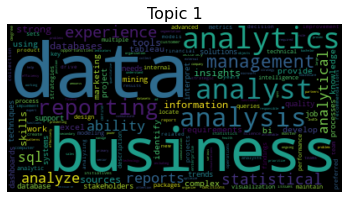

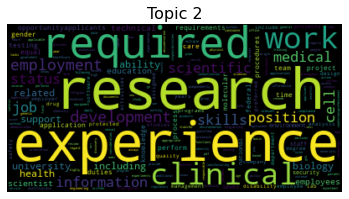

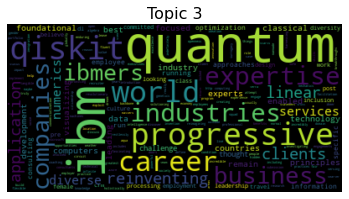

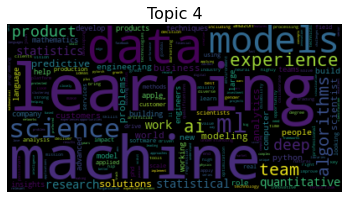

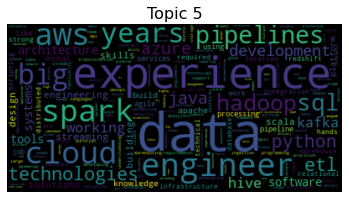

In [76]:

%matplotlib inline

def draw_wordcloud(dict, topic_number):
    wc = WordCloud(max_words=1000)    
    wordcloud = WordCloud().generate_from_frequencies(dict)
    
    plt.title('Topic %s' %str(topic_number), size = 16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")        
    plt.show()

draw_wordcloud(dict(ds_topic1), topic_number=1)
draw_wordcloud(dict(ds_topic2), topic_number=2)
draw_wordcloud(dict(ds_topic3), topic_number=3)
draw_wordcloud(dict(ds_topic4), topic_number=4)
draw_wordcloud(dict(ds_topic5), topic_number=5)

Larger fonts indicate higher weights of the words in a topic and the colors are randomly assigned. 

## Data Analyst Roles

In [39]:
da.head()

,JobTitle,SalaryEstimate,JobDescription,Rating,Company Name,Location,Typeofownership,Industry,Sector,Job Type
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",Nonprofit Organization,Social Assistance,Non-Profit,Data Analyst
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",Nonprofit Organization,Health Care Services & Hospitals,Health Care,Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",Company - Private,Internet,Information Technology,Data Analyst
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",Subsidiary or Business Segment,IT Services,Information Technology,Data Analyst
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",Data Analyst


####  Remove special characters and lower case letters

In [40]:
def clean_text(string_in):
    string_in = re.sub("[^a-zA-Z]", " ", str(string_in))  # Replace all non-letters with spaces
    string_in = string_in.lower()                         # Tranform to lower case    
    
    return string_in.strip()

da["description_cleaned"] = da.JobDescription.apply(clean_text)

In [41]:
da.head()

,JobTitle,SalaryEstimate,JobDescription,Rating,Company Name,Location,Typeofownership,Industry,Sector,Job Type,description_cleaned
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",Nonprofit Organization,Social Assistance,Non-Profit,Data Analyst,are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",Nonprofit Organization,Health Care Services & Hospitals,Health Care,Data Analyst,overview provides analytical and technical su...
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",Company - Private,Internet,Information Technology,Data Analyst,we re looking for a senior data analyst who ha...
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",Subsidiary or Business Segment,IT Services,Information Technology,Data Analyst,requisition numberrr remote yes we col...
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",Data Analyst,about fanduel group fanduel group is a world ...


####  Creating tokens for the text

In [42]:
preprocessed = [" ".join(RegexpTokenizer(r'\w+').tokenize(da.description_cleaned[idx])) for idx in da.index]

### Indentifying topics

#### Term frequency - Inverse document frequency

Removing "stop words" such as "being", "for", "the" etc. These are defined in the scikit-learn package.

In [43]:
custom_stop_words = []
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)



In [44]:
# ! pip install prettytable

In [45]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [46]:
vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                             stop_words = my_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print("Created document-term matrix of size %d x %d" % (tfidf.shape[0],tfidf.shape[1]))

Created document-term matrix of size 2253 x 18108


###  Non-negative matrix factorization analysis

In [47]:
nmf = decomposition.NMF(init = 'nndsvd', n_components = 5, max_iter = 200)
W = nmf.fit_transform(tfidf)
H = nmf.components_
print("Generated W(document-topic)) matrix of size %s and H (topic-word) matrix of size %s" % ( str(W.shape), str(H.shape)))

feature_names = vectorizer.get_feature_names()
n_top_words = 10

# Print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Generated W(document-topic)) matrix of size (2253, 5) and H (topic-word) matrix of size (5, 18108)
Topic #0:
data experience business quality governance analysis sql requirements analyst management

Topic #1:
data locate statistical databases packages analyze interpret systems techniques information

Topic #2:
work status skills information ability management job employment required experience

Topic #3:
data analytics business insights marketing product experience team company work

Topic #4:
health data care healthcare research clinical experience analysis tools claims



### Word cloud to better visualize the topics

In [48]:
# Create pandas dataframe for the topics
mydf = pd.DataFrame({"feature_name": feature_names})

for topic_idx, topic in enumerate(H):
    mydf["topic_" + str(topic_idx)] = topic

mylist = list(mydf.itertuples())

da_topic1 = []
da_topic2 = []
da_topic3 = []
da_topic4 = []
da_topic5 = []


for order_id, key, num1, num2, num3, num4, num5 in mylist:
    da_topic1.append((key, num1))
    da_topic2.append((key, num2))
    da_topic3.append((key, num3))
    da_topic4.append((key, num4))
    da_topic5.append((key, num5))

da_topic1 = sorted(da_topic1, key=lambda myword: myword[1], reverse=True)
da_topic2 = sorted(da_topic2, key=lambda myword: myword[1], reverse=True)
da_topic3 = sorted(da_topic3, key=lambda myword: myword[1], reverse=True)
da_topic4 = sorted(da_topic4, key=lambda myword: myword[1], reverse=True)
da_topic5 = sorted(da_topic5, key=lambda myword: myword[1], reverse=True)

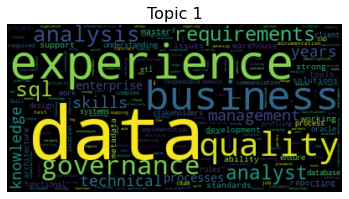

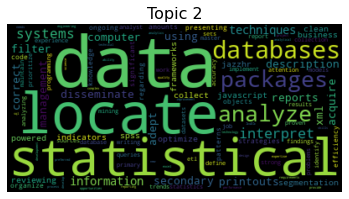

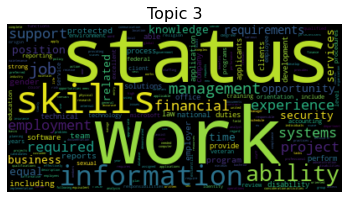

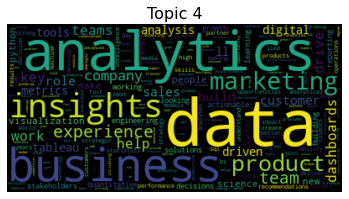

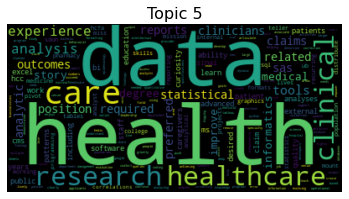

In [49]:

%matplotlib inline

def draw_wordcloud(dict, topic_number):
    wc = WordCloud(max_words=1000)    
    wordcloud = WordCloud().generate_from_frequencies(dict)
    
    plt.title('Topic %s' %str(topic_number), size = 16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")        
    plt.show()

draw_wordcloud(dict(da_topic1), topic_number=1)
draw_wordcloud(dict(da_topic2), topic_number=2)
draw_wordcloud(dict(da_topic3), topic_number=3)
draw_wordcloud(dict(da_topic4), topic_number=4)
draw_wordcloud(dict(da_topic5), topic_number=5)

Larger fonts indicate higher weights of the words in a topic and the colors are randomly assigned. 

## Business Analyst Roles

In [50]:
ba.head()

,JobTitle,SalaryEstimate,JobDescription,Rating,Company Name,Location,Typeofownership,Industry,Sector,Job Type
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY",Nonprofit Organization,Health Care Services & Hospitals,Health Care,Business Analyst
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY",Company - Private,Venture Capital & Private Equity,Finance,Business Analyst
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ",Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Business Analyst
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ",Company - Public,Health Care Products Manufacturing,Manufacturing,Business Analyst
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY",Company - Public,Internet,Information Technology,Business Analyst


####  Remove special characters and lower case letters

In [51]:
def clean_text(string_in):
    string_in = re.sub("[^a-zA-Z]", " ", str(string_in))  # Replace all non-letters with spaces
    string_in = string_in.lower()                         # Tranform to lower case    
    
    return string_in.strip()

ba["description_cleaned"] = ba.JobDescription.apply(clean_text)

In [52]:
ba.head()

,JobTitle,SalaryEstimate,JobDescription,Rating,Company Name,Location,Typeofownership,Industry,Sector,Job Type,description_cleaned
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY",Nonprofit Organization,Health Care Services & Hospitals,Health Care,Business Analyst,company overview at memorial sloan kettering...
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY",Company - Private,Venture Capital & Private Equity,Finance,Business Analyst,we are seeking for an energetic and collaborat...
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ",Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Business Analyst,for more than a decade asembia has been worki...
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ",Company - Public,Health Care Products Manufacturing,Manufacturing,Business Analyst,job description summary the information securi...
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY",Company - Public,Internet,Information Technology,Business Analyst,magnite is the world s largest independent sel...


####  Creating tokens for the text

In [53]:
preprocessed = [" ".join(RegexpTokenizer(r'\w+').tokenize(ba.description_cleaned[idx])) for idx in ba.index]

### Indentifying topics

#### Term frequency - Inverse document frequency

Removing "stop words" such as "being", "for", "the" etc. These are defined in the scikit-learn package.

In [54]:
custom_stop_words = []
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)



In [55]:
# ! pip install prettytable

In [56]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [57]:
vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                             stop_words = my_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print("Created document-term matrix of size %d x %d" % (tfidf.shape[0],tfidf.shape[1]))

Created document-term matrix of size 4092 x 22689


###  Non-negative matrix factorization analysis

In [58]:
nmf = decomposition.NMF(init = 'nndsvd', n_components = 5, max_iter = 200)
W = nmf.fit_transform(tfidf)
H = nmf.components_
print("Generated W(document-topic)) matrix of size %s and H (topic-word) matrix of size %s" % ( str(W.shape), str(H.shape)))

feature_names = vectorizer.get_feature_names()
n_top_words = 10

# Print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Generated W(document-topic)) matrix of size (4092, 5) and H (topic-word) matrix of size (5, 22689)
Topic #0:
business requirements experience project technical systems user skills functional development

Topic #1:
data business experience analytics sql reporting analysis insights intelligence tableau

Topic #2:
financial work experience status support management employment company position opportunity

Topic #3:
staffigo llc services technical synergy technologies fl facilities clearinghouses grateful

Topic #4:
product improvement requirements team help business optimizes explaining conceptualize try



### Word cloud to better visualize the topics

In [60]:
# Create pandas dataframe for the topics
mydf = pd.DataFrame({"feature_name": feature_names})

for topic_idx, topic in enumerate(H):
    mydf["topic_" + str(topic_idx)] = topic

mylist = list(mydf.itertuples())

ba_topic1 = []
ba_topic2 = []
ba_topic3 = []
ba_topic4 = []
ba_topic5 = []


for order_id, key, num1, num2, num3, num4, num5 in mylist:
    ba_topic1.append((key, num1))
    ba_topic2.append((key, num2))
    ba_topic3.append((key, num3))
    ba_topic4.append((key, num4))
    ba_topic5.append((key, num5))

ba_topic1 = sorted(ba_topic1, key=lambda myword: myword[1], reverse=True)
ba_topic2 = sorted(ba_topic2, key=lambda myword: myword[1], reverse=True)
ba_topic3 = sorted(ba_topic3, key=lambda myword: myword[1], reverse=True)
ba_topic4 = sorted(ba_topic4, key=lambda myword: myword[1], reverse=True)
ba_topic5 = sorted(ba_topic5, key=lambda myword: myword[1], reverse=True)

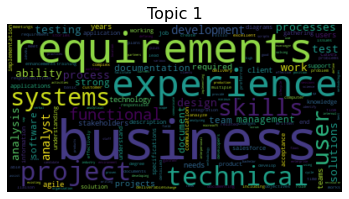

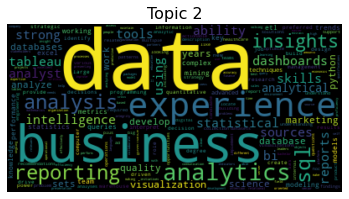

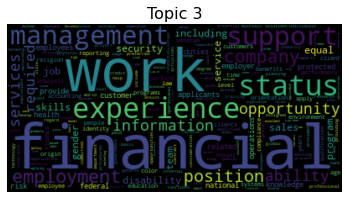

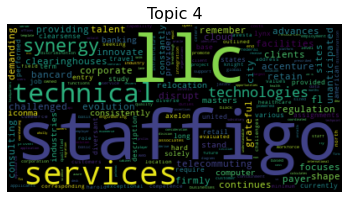

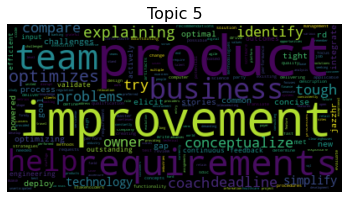

In [61]:

%matplotlib inline

def draw_wordcloud(dict, topic_number):
    wc = WordCloud(max_words=1000)    
    wordcloud = WordCloud().generate_from_frequencies(dict)
    
    plt.title('Topic %s' %str(topic_number), size = 16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")        
    plt.show()

draw_wordcloud(dict(ba_topic1), topic_number=1)
draw_wordcloud(dict(ba_topic2), topic_number=2)
draw_wordcloud(dict(ba_topic3), topic_number=3)
draw_wordcloud(dict(ba_topic4), topic_number=4)
draw_wordcloud(dict(ba_topic5), topic_number=5)